In [4]:
from sklearn.datasets import load_boston

In [5]:
boston=load_boston()

In [9]:
#description of the dataset
print(boston['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
#structure of the data set
#data---training features
#target---value to predict
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [11]:
boston['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [12]:
X=boston['data']

In [13]:
y=boston['target']

In [14]:
from sklearn.model_selection import train_test_split

In [66]:
#spliting the data as 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=201)

In [67]:
from sklearn.linear_model import LinearRegression

In [68]:
lm=LinearRegression()

In [69]:
#training the model
lm.fit(X_train,y_train)

LinearRegression()

In [70]:
#coefficients of trained model
lm.coef_

array([-1.28943198e-01,  4.17087269e-02,  3.42268745e-02,  3.88662555e+00,
       -1.86022135e+01,  4.48447204e+00, -9.93213814e-04, -1.47322889e+00,
        3.56209991e-01, -1.29231842e-02, -8.81159864e-01,  9.11497634e-03,
       -4.96911540e-01])

In [71]:
import pandas as pd
import numpy as np

In [72]:
cdf=pd.DataFrame(lm.coef_,boston['feature_names'],columns=['coefficient'])

In [73]:
#data frame of coefficients
cdf

,coefficient
CRIM,-0.128943
ZN,0.041709
INDUS,0.034227
CHAS,3.886626
NOX,-18.602213
RM,4.484472
AGE,-0.000993
DIS,-1.473229
RAD,0.356210
TAX,-0.012923


In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

In [75]:
%matplotlib inline

In [76]:
#prediction on test data
prediction=lm.predict(X_test)

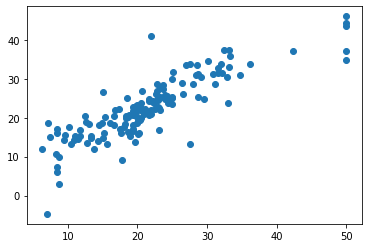

In [77]:
#relation of predicted values and actual data
plt.scatter(y_test,prediction)

<AxesSubplot:ylabel='Count'>

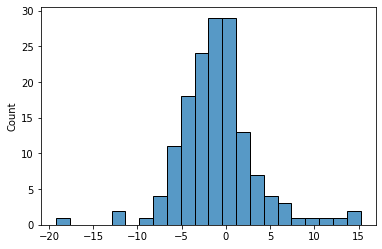

In [83]:
# a histogram of residue (the more uniformly distributed the better)
sns.histplot(y_test-prediction)

In [79]:
from sklearn import metrics

In [ ]:
#calculation of our models metrics(performance)

In [80]:
#R2 score
metrics.explained_variance_score(y_test,prediction)

0.7279664659410934

In [81]:
#mean squared error
mse=metrics.mean_squared_error(y_test,prediction)

In [82]:
#root mean squared error
np.sqrt(mse)

4.6089606491268045

In [90]:
#CONCLUSION
###To predict the price of the house use the below coefficients
### i.e price= -0.128943 CRIM + 0.041709ZN + 0.034227 INDUS + ..... + -0.496912 LSTAT

In [92]:
print(cdf)

         coefficient
CRIM       -0.128943
ZN          0.041709
INDUS       0.034227
CHAS        3.886626
NOX       -18.602213
RM          4.484472
AGE        -0.000993
DIS        -1.473229
RAD         0.356210
TAX        -0.012923
PTRATIO    -0.881160
B           0.009115
LSTAT      -0.496912
